# **Project Phase 2: Model Execution Instructions**

This directory contains the source code for the 6 machine learning and statistical models applied to the NYC Green Taxi dataset for the EAS 587 course project.

## **Requirements**

* A web browser  
* A Google Account (for using Google Colab)

## **Files Included**

* `taxi_data.csv`: The dataset used by all notebooks.  
* `model_1_LinearRegression.ipynb`: Notebook for the Linear Regression model.  
* `model_2_KNN.ipynb`: Notebook for K-Nearest Neighbors and K-Means models.  
* `model_3_DecisionTree.ipynb`: Notebook for the Decision Tree classification model.  
* `model_4_RandomForest.ipynb`: Notebook for the Random Forest regression model.  
* `model_5_DBSCAN.ipynb`: Notebook for the DBSCAN clustering model.  
* `model_6_ARIMA.ipynb`: Notebook for the ARIMA and Prophet time-series models.

## **Step-by-Step Execution Instructions**

To reproduce the results, please follow these steps for each of the 6 notebooks.

1. **Navigate to Google Colab** Open your web browser and go to [https://colab.research.google.com/](https://colab.research.google.com/).  
2. **Upload Project Files** On the left-hand side of the Colab interface, click the **"Files"** icon (it looks like a folder). Click the **"Upload to session storage"** icon and select all the files from this `src/` directory (the 6 `.ipynb` notebooks and `taxi_data.csv`). Wait for all files to finish uploading.  
3. **Open a Notebook** In the file browser on the left, double-click on one of the notebook files (e.g., `LinearRegression.ipynb`) to open it in the main editor.  
4. **Run the Notebook** Once the notebook is open and has connected to a runtime, go to the top menu and select **Runtime \-\> Run all**.  
5. **View Results** The notebook will now execute from the first cell to the last, producing all the model metrics, tables, and visualizations described in the report.  
6. **Repeat for Other Models** Repeat steps 3-5 for the remaining 5 notebook files to see the results for each model. Make sure you upload the `taxi_data.csv` file for every python notebook.

**Important Note on Colab Runtimes:** The files uploaded to a Google Colab session are temporary. If your session disconnects or times out (e.g., after being idle), the uploaded files will be deleted. If this happens, you will need to re-upload the `taxi_data.csv` file (Step 2).



Accuracy: 0.806

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     18514
           1       0.65      0.57      0.61      6671

    accuracy                           0.81     25185
   macro avg       0.75      0.73      0.74     25185
weighted avg       0.80      0.81      0.80     25185



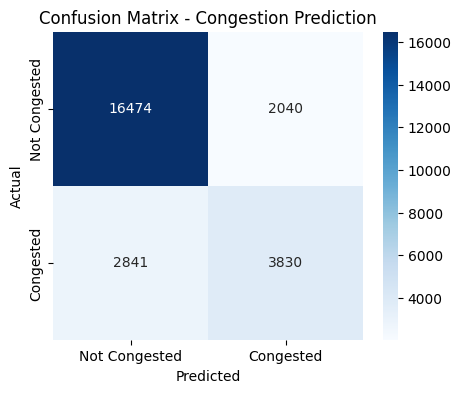

/tmp/ipython-input-2558456736.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


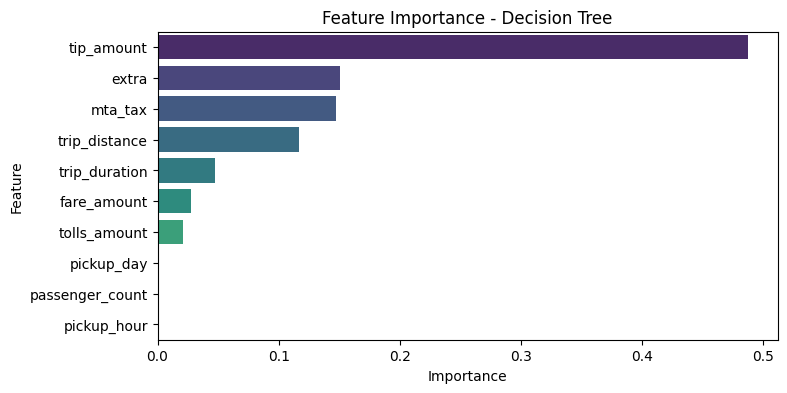

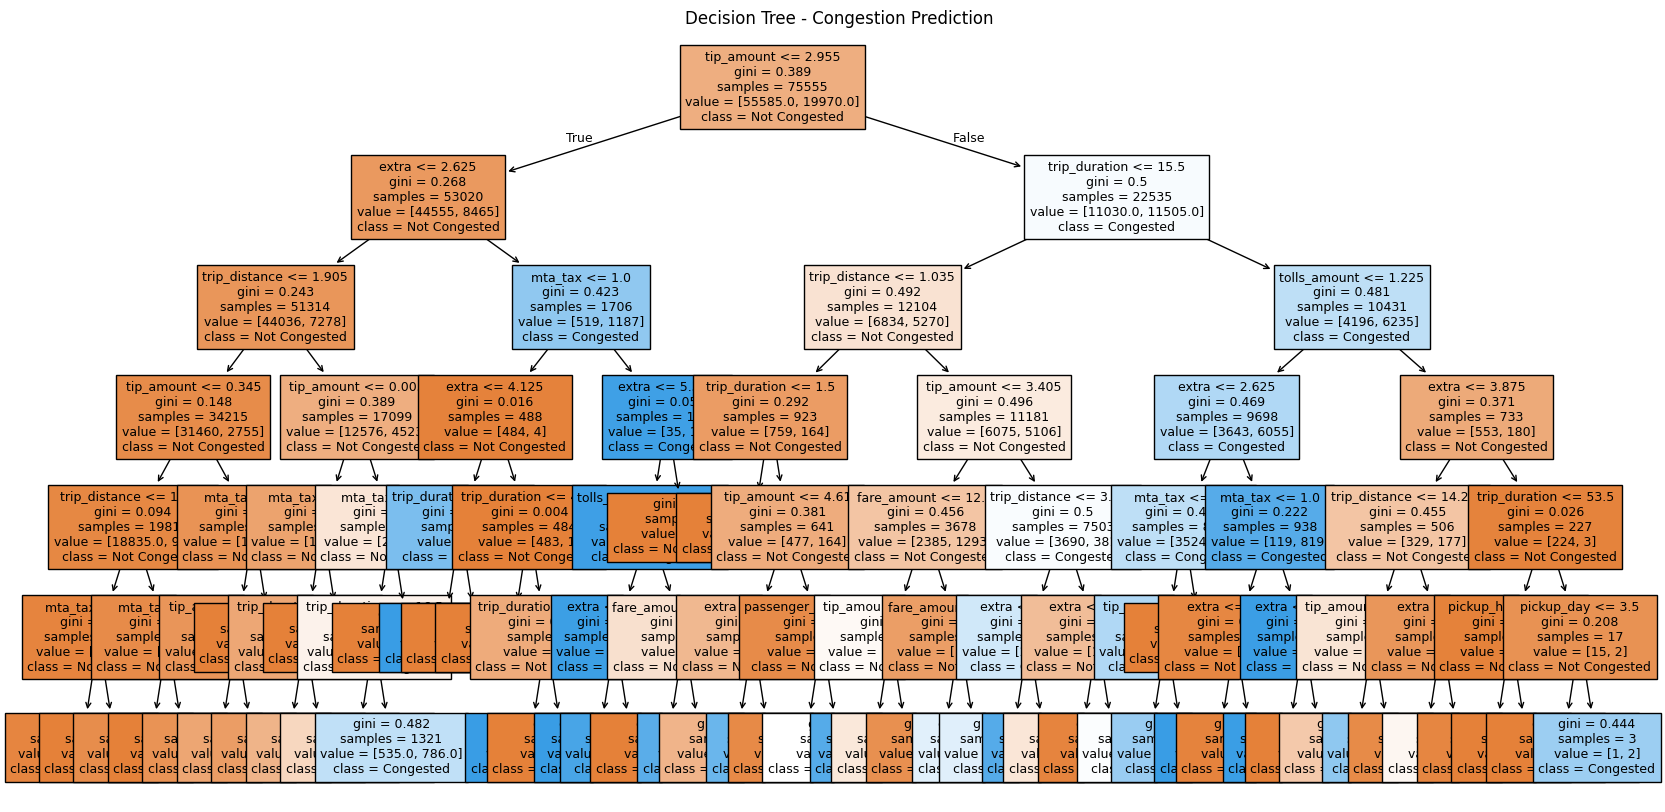

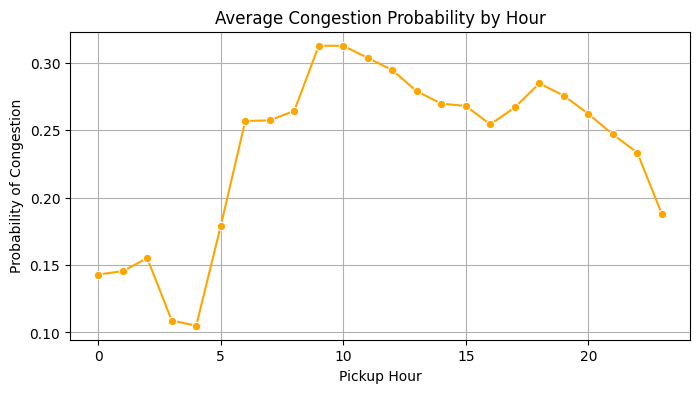

In [1]:
# ==========================================
# Decision Tree Classifier: Predict Congested Trips
# ==========================================

# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# --- 2. Load Dataset ---
df = pd.read_csv("taxi_data.csv")

# --- 3. Parse Date Columns ---
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

# --- 4. Feature Engineering ---

# Trip Duration (minutes)
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Extract Temporal Features
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Define Target Variable (1 = Congested, 0 = Not Congested)
df['is_congested'] = (df['congestion_surcharge'] > 0).astype(int)

# Select Features
features = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'pickup_hour', 'pickup_day',
    'passenger_count', 'trip_duration'
]

df = df[features + ['is_congested']].dropna()

# --- 5. Split Data ---
X = df[features]
y = df['is_congested']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --- 6. Train Decision Tree Classifier ---
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(X_train, y_train)

# --- 7. Evaluate ---
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("\nClassification Report:\n", report)

# --- 8. Visualizations ---

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Congested', 'Congested'], yticklabels=['Not Congested', 'Congested'])
plt.title('Confusion Matrix - Congestion Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Decision Tree Plot
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features, class_names=['Not Congested', 'Congested'], filled=True, fontsize=9)
plt.title('Decision Tree - Congestion Prediction')
plt.show()

# Hourly Congestion Rate Visualization
hourly_congestion = df.groupby('pickup_hour')['is_congested'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x=hourly_congestion.index, y=hourly_congestion.values, marker='o', color='orange')
plt.title('Average Congestion Probability by Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Probability of Congestion')
plt.grid(True)
plt.show()
